In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv(r"C:\Users\ozcel\OneDrive\Masaüstü\diabetes_dataset.csv")  

missing_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[missing_columns] = df[missing_columns].replace(0, np.nan)  

print(df.isnull().sum())

for col in missing_columns:
    df.loc[:, col] = df[col].fillna(df[col].median())

print(df.isnull().sum())



Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Bu kod satırlarında yapılanlar:
İlk olarak Pima Indian Diabetes veri seti okunarak Data Frame (df) olarak saklandı. 
Daha sonra veri setinde 0 olan değerler yani eksik veriler aykırı değerlerin etkisini azaltabilmek adına medyan yöntemi kullanılarak NaN olarak değiştirildi.
Son olarak print(df.isnull().sum()) kod satırı ile eksik veri olup olmadığı kontrol edildi. 


In [31]:
 
df["AgeCategory"] = pd.cut(df["Age"], bins=[0, 30, 50, 100], labels=["Genç", "Orta Yaşlı", "Yaşlı"])

df["PregnancyRatio"] = df["Pregnancies"] / (df["Age"] + 1)

df["HealthRiskScore"] = df["BMI"] * df["Glucose"]

print(df.head().to_string())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome AgeCategory  PregnancyRatio  HealthRiskScore
0            6    148.0           72.0           35.0    125.0  33.6                     0.627   50        1  Orta Yaşlı        0.117647           4972.8
1            1     85.0           66.0           29.0    125.0  26.6                     0.351   31        0  Orta Yaşlı        0.031250           2261.0
2            8    183.0           64.0           29.0    125.0  23.3                     0.672   32        1  Orta Yaşlı        0.242424           4263.9
3            1     89.0           66.0           23.0     94.0  28.1                     0.167   21        0        Genç        0.045455           2500.9
4            0    137.0           40.0           35.0    168.0  43.1                     2.288   33        1  Orta Yaşlı        0.000000           5904.7


Not: pd.cut() fonksiyonu sayısal bir değişkeni belirli aralıklara böler. Amaç değişkenin kategorik hale gelmesini sağlamaktır. Bı kod satırında age değikenlerini belirli aralıklara bölerek orta yaşlı, genç ve yaşlı olarak kategorize etmemizi sağladı.
2. kod satırında hamilelik sayısını kişinin yaşına bölerek oransal bir değer elde etmemiz sağlandı. Yaş verisine +1 eklenmemsinin sebebi hamilelik sayısının 0 olması durumunda oluşabilecek hatanın önüne geçmektir. 
3. kod satırında sağlık riski skorunun hesaplanabilmesi adına vücut kitle indeksi(BMI) glikoz seviyesi ile çarpılmıştır. Obezite ve yüksek kan şekeri arasındaki bağlantıyı gözlemleyebilmemiz için olanak sağlayabilir. 


In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["Glucose", "BloodPressure", "BMI"]] = scaler.fit_transform(df[["Glucose", "BloodPressure", "BMI"]]) # fit_transform(): Seçilen sütunları eğitir ve ölçeklendirilmiş veriyi yerine koyar.


Bu kodda min max normaralizasyonu uygulanmıştır. Uygulanma amacı glucose, BMI ve BloodPressure sütunları 0 ve 1 arasına ölçeklendirmektir.  

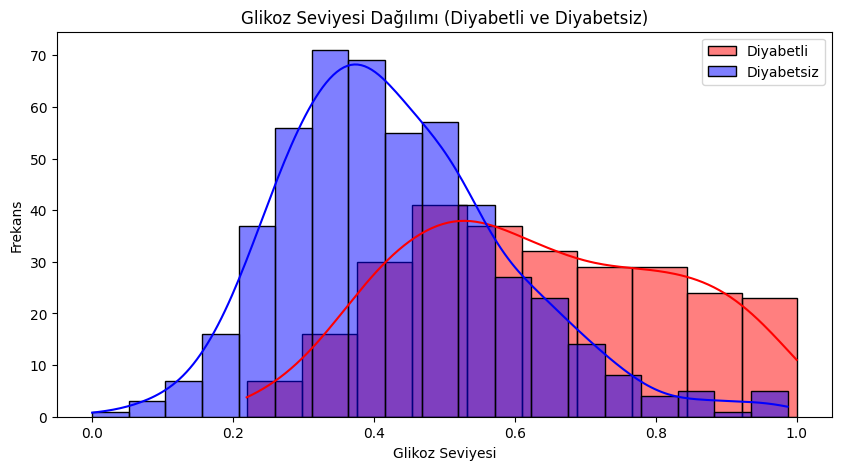

In [33]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df["Outcome"] == 1]["Glucose"], color="red", label="Diyabetli", kde=True)
sns.histplot(df[df["Outcome"] == 0]["Glucose"], color="blue", label="Diyabetsiz", kde=True)
plt.legend()
plt.title("Glikoz Seviyesi Dağılımı (Diyabetli ve Diyabetsiz)")
plt.xlabel("Glikoz Seviyesi")
plt.ylabel("Frekans")
plt.show()


Bu kod diyabetlive diyabetsiz bireylerin glikoz sevilerinin dağılımını inceleyebileceğimiz bir histogram grafiği oluşturuyor. 

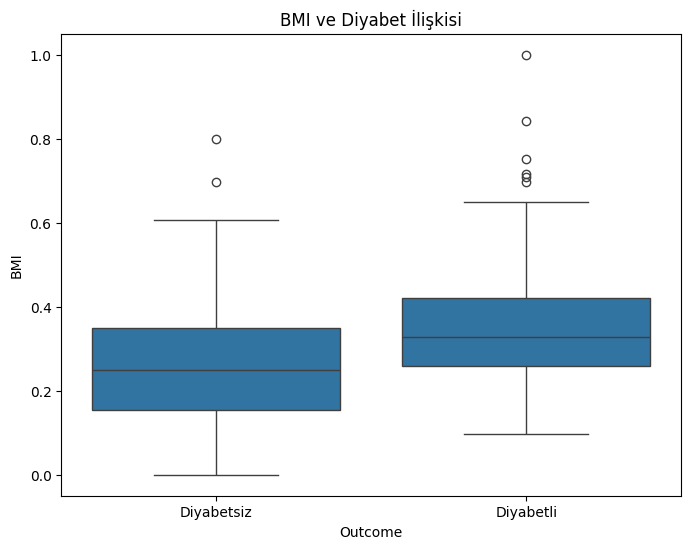

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Outcome", y="BMI", data=df)
plt.xticks([0, 1], ["Diyabetsiz", "Diyabetli"])
plt.title("BMI ve Diyabet İlişkisi")
plt.show()


BMI ve iyabet arasındaki ilişkiyi bir kutu grafiği ile görselleştirir. 

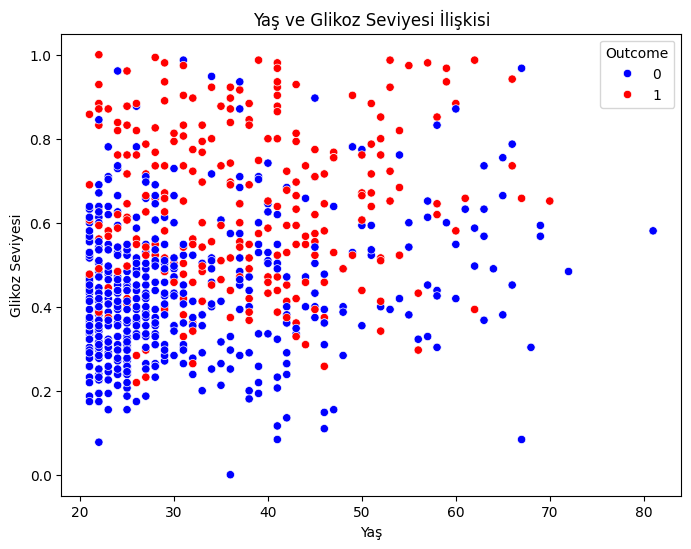

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Age"], y=df["Glucose"], hue=df["Outcome"], palette=["blue", "red"])
plt.title("Yaş ve Glikoz Seviyesi İlişkisi")
plt.xlabel("Yaş")
plt.ylabel("Glikoz Seviyesi")
plt.show()


Yaş ve glikoz seviyesi arasındaki ilişkiyi, diyabet durumu (Outcome) bazında görselleştirmek için bir dağılım grafiği çizer.

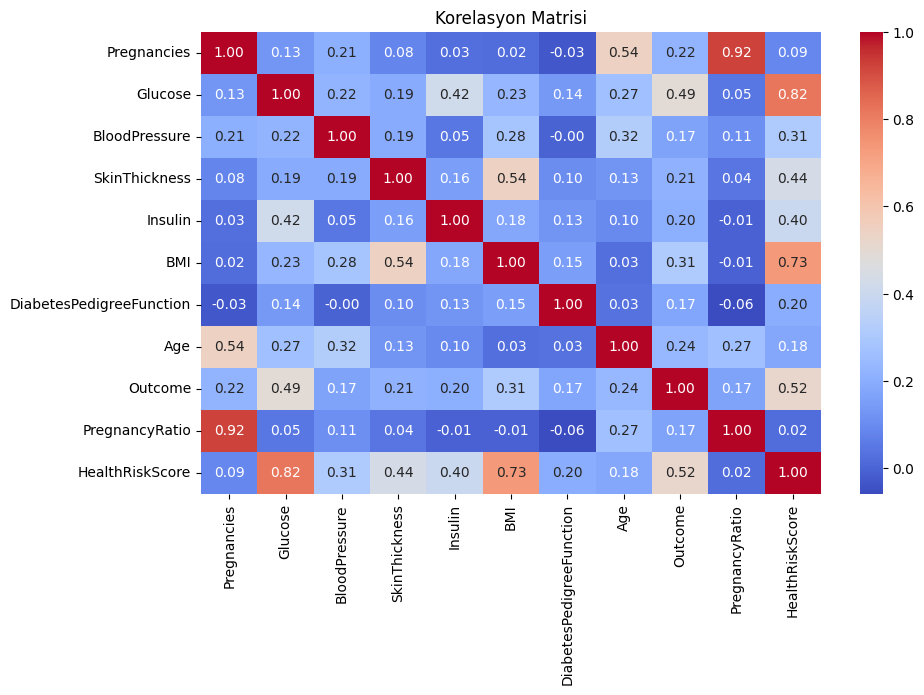

In [36]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()


Veri setindeki sayısal değişkenler arasındaki korelasyonu gösteren bir korelasyon matrisi oluşturulur. 

In [17]:
def high_correlation_columns(corr_matrix, threshold=0.85):
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_cols = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    return drop_cols
drop_columns = high_correlation_columns(corr_matrix, threshold=0.85)
df.drop(columns=drop_columns, inplace=True, errors="ignore")
print(f"Kaldırılan sütunlar: {drop_columns}")

Kaldırılan sütunlar: ['PregnancyRatio']


Bu kod yüksek korelasyonlu sütunları veri setinden kaldırarak multicollinearityi ( çoklu doğrusallık = bağımsız değişkenlerin biribiriyle yğksek korelasyona sahip olması durumudur.) azaltmayı amaçlar. 

In [18]:
df.drop(columns=drop_columns, inplace=True, errors="ignore")
print(f"Güncellenmiş sütunlar: {df.columns}")


Güncellenmiş sütunlar: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'AgeCategory',
       'HealthRiskScore'],
      dtype='object')


yüksek korelasyona sahip değişkenleri veri setinden çıkarır. 

In [19]:

target_corr = corr_matrix["Outcome"].sort_values(ascending=False)
print(target_corr)


Outcome                     1.000000
HealthRiskScore             0.519906
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
PregnancyRatio              0.166501
BloodPressure               0.165723
Name: Outcome, dtype: float64


Bağımsız değişkenlerin diyabet olup olmam durumu ile olan ilişkisini inceleyebilmek adına bu kod satırını yazdık. En yüksek korelasyona sahip değişkenler bu noktada daha çok işimize yarayabilir. 

In [29]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Y = df['Outcome']
X = df.drop('Outcome', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0, stratify=Y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # veri standartlaştırma işlemi 

model = LogisticRegression(max_iter=500) # lojistik regresyon modeli eğitiliyor. 
model.fit(X_train, Y_train)
y_predict = model.predict(X_test) # test verisi kullanılarak tahminlerde bulunuluyor. 
accuracy = accuracy_score(Y_test, y_predict)
print("Accuracy:", round(accuracy * 100, 2), '%')




Accuracy: 77.27 %


Bu kod satırlarında standartlaştırma, veriyi eğitme gibi işlemleri gerçekleştirebilmek için gerekli kütüphaneleri from- import ile içeri aktardık.
Y(bağımlı değişken) ve X( bağımsız değişken) ayırılıyor. 
Veri eğitim ve test setlerine ayrılıyor. (X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0, stratify=Y))

accuracy = accuracy_score(Y_test, y_predict)
print("Accuracy:", round(accuracy * 100, 2), '%') kod satırları modelin doğruluğunu ölçmek için kullanılıyor. 


ÖZET: İlk olarak veri setinin incelenmesi ve ön işlemesi adımları gerçekleştirildi. 
İkinci olarak eksik verilerin olup olmadığı incelendi. Eksik değerler medyan yöntemi ile dolduruldu. 
Üçüncü olarak veriler üzerinde normalizasyon ve standartlaştırma işlemleri gerçekleştirilmiştir. Bu adımın amacı değerlerin 0 ile 1 arasına çekilerek modelin daha sağlıklı öğrenmesini sağlayabilmek.
Veri üzerinde daha kolay gözlem yapabilmek adına değerler arasındaki ilişkiler veri görselleştirme yöntemleri kullanılarak grafikleştirildi. 
Yüksek korelasyona sahip olan değişkenler çoklu doğrusallığıya sebeyiyet verebileceğinden, yüksek korelasyona sahip olan PregnancyRatio sütunu kaldırıldı. 
Veri ön işleme adımımları tamamlandıktan sonra bir sınıflandırma modeli oluşturduk. (Bağımlı ve bağımsız değişkenler belirlendi.) 
Veri eğitim ve test setlerine ayrıldı. Logistic Regression modelini eğitildi.  Modelin doğruluğu hesaplanarak başarısı değerlendirildi. 